In [91]:
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

data_baru = pd.read_csv("hasilpreprocessing_training.csv")
# #memilih feature yang akan digunakan
X = data_baru.drop('account_type', axis=1) # Memilih semua kolom kecuali 'class'
y = data_baru['account_type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)


In [92]:
data_baru.head()

,default_profile,favourites_count,followers_count,friends_count,location,statuses_count,verified,account_age_days,account_type,ratio_statuses_count_per_age,ratio_favorites_per_age,ratio_friends_per_followers,word_count,char_count,reputation,contains_bot_name,description_word_count,description_character_count,avg_word
0,True,2169,0,111,True,2195,False,2875,bot,0.763478,0.754435,2.303236,18,102,0.000000,False,18,85,4.722222
1,True,54,6,65,True,11,False,4014,bot,0.002740,0.013453,10.833333,8,54,0.084507,False,8,47,5.875000
2,False,34328,1132,468,True,28628,False,2988,human,9.580991,11.488621,0.413428,10,54,0.707500,False,10,45,4.500000
3,False,6737,83,382,True,13023,False,2277,human,5.719368,2.958718,4.602410,1,21,0.178495,False,2,20,10.000000
4,False,13498,4397,198,True,15257,False,3036,human,5.025362,4.445982,0.045031,19,157,0.956910,False,19,139,7.315789


Akurasi: 0.8666666666666667


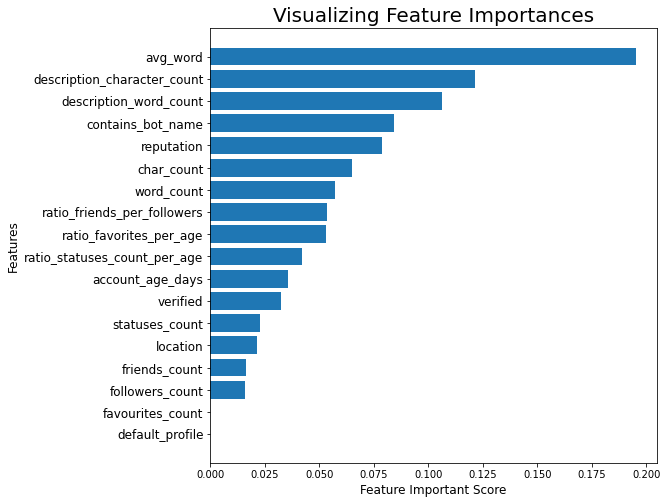

In [93]:
# Membuat model Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data latih
model.fit(X_train, y_train)

tree_feature =  pd.Series(model.feature_importances_, X.columns).sort_values(ascending = True)
plt.figure(figsize = (8,8))
plt.barh(X.columns, tree_feature)
plt.xlabel('Feature Important Score', fontsize = 12)
plt.ylabel('Features', fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Visualizing Feature Importances', fontsize = 20)
# Memprediksi label pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

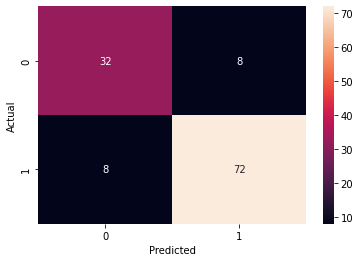

[[32  8]
 [ 8 72]]


In [94]:
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
from collections import OrderedDict

cm = confusion_matrix(y_test, y_pred)

# membuat plot confusion matrix
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(cm)

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bot       0.80      0.80      0.80        40
       human       0.90      0.90      0.90        80

    accuracy                           0.87       120
   macro avg       0.85      0.85      0.85       120
weighted avg       0.87      0.87      0.87       120



In [96]:
#untuk menyimpan model
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(MinMaxScaler(),RandomForestClassifier()) 
pipe.fit(X_train, y_train)
joblib.dump(pipe, 'model.pkl')

['model.pkl']